In [1]:
using Revise, LinearAlgebra, BlockArrays, Statistics, PyPlot
includet("hw1_functions.jl")

In [2]:
function barbell(n)
    W1 = Float64.(ones(n,n) - I)
    W = BlockArray{Float64}(undef_blocks, [n,n], [n,n])
    setblock!(W,W1,1,1)
    setblock!(W,W1,2,2)
    setblock!(W,zeros(n,n),1,2)
    setblock!(W,zeros(n,n),2,1)
    W = Array(W)
    W[1,2*n], W[2*n,1] = 1.0, 1.0;

    return  Graph(W)
end

function french_de_groot(P, x0, T; ϵ=1e-3, target=[])
    N = length(x0)

    x = x0
    t = 0

    while true
        x0 = x
        x = P*x0
        t += 1
        (norm(x-target)/norm(target) ≤ ϵ) && break
    end
    return t
end

french_de_groot (generic function with 1 method)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


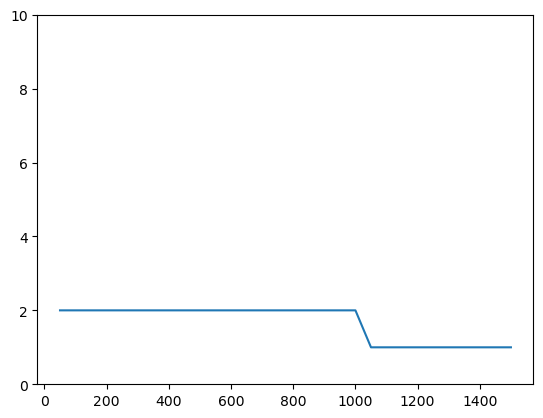

In [4]:
T = 1e3

nn_x = [50; 100; 150; 200; 250; 300; 350; 400; 450; 500; 550; 600; 650; 700; 750; 800; 850; 900; 950; 1000; 1050;
        1100; 1150; 1200; 1250; 1300; 1350; 1400; 1450; 1500]
tt_x = Vector{Int}(undef,length(nn_x))

for n in nn_x
    G = barbell(n)
    x_in = [(mod(i,2)==0 ? 0 : 1) for i in 1:2*n]

    tt_x[searchsortedfirst(nn_x,n)] = french_de_groot(G.P, x_in, T, target=0.5*ones(2*n))
end

close("all")
println(nn_x)
println(tt_x)
plot(nn_x,tt_x)
ylim([0,10])
gcf()

In [5]:
nstart = 6
nstop = 8
niter = 100
T = 1e6

# nn_y = [1000; 1100; 1200; 1300; 1400; 1500; 1600; 1700; 1800; 1900; 2000]
nn_y = [1000]
tt_y = Vector{Int}(undef,length(nn_y))

for n in nn_y
    G = barbell(n)
    y_in = [ones(n); zeros(n)]
    tt_y[searchsortedfirst(nn_y,n)] = french_de_groot(G.P, y_in, T, target=0.5*ones(2*n))
end

println(nn_y)
println(tt_y)
a = tt_y./((nn_y./2).^2)
println(a)

close("all")
plot(nn_y,tt_y)
gcf()